In [ ]:
# Research questions ->
# 1. is there a correlation between the origin of the show and the average rating of the first season?
# 2. How does the amount of seasons there are relate 

# Making the API turn into a dataframe and merge the Netflix data frame with the API and just overall cleaning

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import requests
import time

In [223]:
df = pd.read_csv("data/netflix1.csv", encoding = 'ISO-8859-1', dtype=object)
df.head(20)
df.head()

df_tv_shows = df[df["type"] == "TV Show"]

In [45]:
df[df['title'] == "Bitten"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8371,s6319,TV Show,Bitten,Not Given,Canada,5/26/2016,2016,TV-MA,3 Seasons,"International TV Shows, TV Dramas, TV Horror"


In [108]:
df[df['title'] == "Person of Interest"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8611,s7730,TV Show,Person of Interest,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"


In [111]:
df[df["title"] == "The Vampire Diaries"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8122,s5288,TV Show,The Vampire Diaries,Not Given,United States,9/4/2017,2016,TV-14,8 Seasons,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy"


In [129]:
df_tv_shows
pass

In [123]:
def episode_list (number_of_show):
    print(requests.get(f"https://api.tvmaze.com/shows/{number_of_show}/episodes").json())



In [124]:
res = requests.get("https://api.tvmaze.com/shows").json()
pass

In [128]:
url = 'https://api.tvmaze.com/shows'
response = requests.get(url)

try:
    response.raise_for_status()
    shows = response.json()
    for show in shows:
        print(f"Show ID: {show['id']}, Show Name: {show['name']}")
except requests.exceptions.HTTPError as err:
    print(f"HTTP error occurred: {err}")
    
    


Show ID: 1, Show Name: Under the Dome
Show ID: 2, Show Name: Person of Interest
Show ID: 3, Show Name: Bitten
Show ID: 4, Show Name: Arrow
Show ID: 5, Show Name: True Detective
Show ID: 6, Show Name: The 100
Show ID: 7, Show Name: Homeland
Show ID: 8, Show Name: Glee
Show ID: 9, Show Name: Revenge
Show ID: 10, Show Name: Grimm
Show ID: 11, Show Name: Gotham
Show ID: 12, Show Name: Lost Girl
Show ID: 13, Show Name: The Flash
Show ID: 14, Show Name: Continuum
Show ID: 15, Show Name: Constantine
Show ID: 16, Show Name: Penny Dreadful
Show ID: 18, Show Name: The Amazing Race
Show ID: 19, Show Name: Supernatural
Show ID: 20, Show Name: The Strain
Show ID: 21, Show Name: The Last Ship
Show ID: 22, Show Name: True Blood
Show ID: 23, Show Name: Once Upon a Time in Wonderland
Show ID: 24, Show Name: Hawaii Five-0
Show ID: 25, Show Name: Hellsing
Show ID: 26, Show Name: Hellsing Ultimate
Show ID: 27, Show Name: Berserk
Show ID: 28, Show Name: Californication
Show ID: 29, Show Name: Vikings
Show 

In [171]:
api_url = "https://api.tvmaze.com/shows"
response = requests.get(api_url)
episodes_data = response.json()
df_api = pd.DataFrame(episodes_data)
df_api.head(30)


,id,url,name,type,language,genres,status,runtime,averageRuntime,premiered,...,rating,weight,network,webChannel,dvdCountry,externals,image,summary,updated,_links
0,1,https://www.tvmaze.com/shows/1/under-the-dome,Under the Dome,Scripted,English,"[Drama, Science-Fiction, Thriller]",Ended,60.0,60,2013-06-24,...,{'average': 6.5},99,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,None,"{'tvrage': 25988, 'thetvdb': 264492, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>Under the Dome</b> is the story of a sma...,1704794065,{'self': {'href': 'https://api.tvmaze.com/show...
1,2,https://www.tvmaze.com/shows/2/person-of-interest,Person of Interest,Scripted,English,"[Action, Crime, Science-Fiction]",Ended,60.0,60,2011-09-22,...,{'average': 8.8},97,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,None,"{'tvrage': 28376, 'thetvdb': 248742, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>You are being watched. The government has a...,1704794206,{'self': {'href': 'https://api.tvmaze.com/show...
2,3,https://www.tvmaze.com/shows/3/bitten,Bitten,Scripted,English,"[Drama, Horror, Romance]",Ended,60.0,60,2014-01-11,...,{'average': 7.4},99,"{'id': 7, 'name': 'CTV Sci-Fi Channel', 'count...",None,None,"{'tvrage': 34965, 'thetvdb': 269550, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Based on the critically acclaimed series of...,1704793709,{'self': {'href': 'https://api.tvmaze.com/show...
3,4,https://www.tvmaze.com/shows/4/arrow,Arrow,Scripted,English,"[Drama, Action, Science-Fiction]",Ended,60.0,60,2012-10-10,...,{'average': 7.4},97,"{'id': 5, 'name': 'The CW', 'country': {'name'...",None,None,"{'tvrage': 30715, 'thetvdb': 257655, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>After a violent shipwreck, billionaire play...",1704793737,{'self': {'href': 'https://api.tvmaze.com/show...
4,5,https://www.tvmaze.com/shows/5/true-detective,True Detective,Scripted,English,"[Drama, Crime, Thriller]",Running,60.0,62,2014-01-12,...,{'average': 8.2},100,"{'id': 8, 'name': 'HBO', 'country': {'name': '...",None,None,"{'tvrage': 31369, 'thetvdb': 270633, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Touch darkness and darkness touches you bac...,1706907878,{'self': {'href': 'https://api.tvmaze.com/show...
5,6,https://www.tvmaze.com/shows/6/the-100,The 100,Scripted,English,"[Action, Adventure, Science-Fiction]",Ended,60.0,60,2014-03-19,...,{'average': 7.7},98,"{'id': 5, 'name': 'The CW', 'country': {'name'...",None,None,"{'tvrage': 34770, 'thetvdb': 268592, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>Ninety-seven years ago, nuclear Armageddon ...",1704793476,{'self': {'href': 'https://api.tvmaze.com/show...
6,7,https://www.tvmaze.com/shows/7/homeland,Homeland,Scripted,English,"[Drama, Thriller, Espionage]",Ended,60.0,60,2011-10-02,...,{'average': 8.2},96,"{'id': 9, 'name': 'Showtime', 'country': {'nam...",None,None,"{'tvrage': 27811, 'thetvdb': 247897, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>The winner of 6 Emmy Awards including Outst...,1704792951,{'self': {'href': 'https://api.tvmaze.com/show...
7,8,https://www.tvmaze.com/shows/8/glee,Glee,Scripted,English,"[Drama, Music, Romance]",Ended,60.0,60,2009-05-19,...,{'average': 6.5},91,"{'id': 4, 'name': 'FOX', 'country': {'name': '...",None,None,"{'tvrage': 21704, 'thetvdb': 83610, 'imdb': 't...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>Glee </b>is a musical comedy about a gro...,1704794174,{'self': {'href': 'https://api.tvmaze.com/show...
8,9,https://www.tvmaze.com/shows/9/revenge,Revenge,Scripted,English,"[Drama, Thriller, Mystery]",Ended,60.0,60,2011-09-21,...,{'average': 7.7},96,"{'id': 3, 'name': 'ABC', 'country': {'name': '...",None,None,"{'tvrage': 28387, 'thetvdb': 248837, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>This is not a story about forgiveness; <b>R...,1704794148,{'self': {'href': 'https://a

In [172]:
df_api.type.unique()

array(['Scripted', 'Reality', 'Animation', 'Talk Show', 'Documentary'],
      dtype=object)

# Creating a Dataframe that includes all the different episodes --> 
# firstly turning the API into a dictionary and then turning this dictionary
# into a dataframe

In [130]:
shows_url = 'https://api.tvmaze.com/shows'
response_shows = requests.get(shows_url)
response_shows.raise_for_status()
shows = response_shows.json()

# List to store episode data
all_episodes_data = []

for show in shows:
    show_id = show['id']
    show_name = show['name']
    episodes_url = f'https://api.tvmaze.com/shows/{show_id}/episodes'
    
    response_episodes = requests.get(episodes_url)
    response_episodes.raise_for_status()
    episodes = response_episodes.json()
    
    
    for episode in episodes:
        episode_data = {
            'Show_ID': show_id,
            'Show_Name': show_name,
            'Episode_ID': episode['id'],
            'Episode_Name': episode['name'],
            'Season': episode['season'],
            'Number': episode['number'],
            'Airdate': episode['airdate']
        }
        all_episodes_data.append(episode_data)

df_episodes = pd.DataFrame(all_episodes_data)


In [132]:
df_episodes.rename(columns={'Show_Name': 'title'}, inplace=True)

# creating seperate dataframes for specific data frames

In [109]:
poi_url = "https://api.tvmaze.com/shows/2/episodes"
response_poi = requests.get(poi_url)
episodes_data_poi = response_poi.json()
df_poi = pd.DataFrame(episodes_data_poi)
df_poi['title'] = 'Person of Interest'


In [106]:
bitten_url = "https://api.tvmaze.com/shows/3/episodes"
response_bitten = requests.get(bitten_url)

episodes_data_bitten = response_bitten.json()
df_bitten = pd.DataFrame(episodes_data_bitten)


df_bitten.head()
pass

In [107]:
df_bitten.tail()
pass

In [77]:
df_bitten['title'] = 'Bitten'

# merging these with the main netflix data frame

In [133]:
merged_df = pd.merge(df_episodes, df_tv_shows, on='title', how='inner')

In [166]:
merged_df.head()


,Show_ID,title,Episode_ID,Episode_Name,Season,Number,Airdate,show_id,type,director,country,date_added,release_year,rating,duration,listed_in
0,2,Person of Interest,28,Pilot,1,1,2011-09-22,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
1,2,Person of Interest,29,Ghosts,1,2,2011-09-29,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
2,2,Person of Interest,30,Mission Creep,1,3,2011-10-06,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
3,2,Person of Interest,31,Cura Te Ipsum,1,4,2011-10-13,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
4,2,Person of Interest,32,Judgement,1,5,2011-10-20,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"


In [113]:
merged_df_poi = pd.merge(df_poi, df_tv_shows, on='title', how='inner')

In [259]:
df_merger = pd.merge(df_api, df_tv_shows, on='title', how='inner')

In [260]:
df_merger

,id,url,title,type_x,language,genres,status,runtime,averageRuntime,premiered,...,average_ranking,show_id,type_y,director,country,date_added,release_year,rating_y,duration,listed_in
0,2,https://www.tvmaze.com/shows/2/person-of-interest,Person of Interest,Scripted,English,"[Action, Crime, Science-Fiction]",Ended,60.0,60,2011-09-22,...,8.8,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
1,3,https://www.tvmaze.com/shows/3/bitten,Bitten,Scripted,English,"[Drama, Horror, Romance]",Ended,60.0,60,2014-01-11,...,7.4,s6319,TV Show,Not Given,Canada,5/26/2016,2016,TV-MA,3 Seasons,"International TV Shows, TV Dramas, TV Horror"
2,4,https://www.tvmaze.com/shows/4/arrow,Arrow,Scripted,English,"[Drama, Action, Science-Fiction]",Ended,60.0,60,2012-10-10,...,7.4,s2948,TV Show,James Bamford,United States,2/5/2020,2019,TV-14,8 Seasons,"Crime TV Shows, TV Action & Adventure"
3,6,https://www.tvmaze.com/shows/6/the-100,The 100,Scripted,English,"[Action, Adventure, Science-Fiction]",Ended,60.0,60,2014-03-19,...,7.7,s1879,TV Show,Not Given,United States,10/8/2020,2020,TV-MA,7 Seasons,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ..."
4,8,https://www.tvmaze.com/shows/8/glee,Glee,Scripted,English,"[Drama, Music, Romance]",Ended,60.0,60,2009-05-19,...,6.5,s668,TV Show,Not Given,United States,6/19/2021,2015,TV-14,6 Seasons,"TV Comedies, TV Dramas, Teen TV Shows"
5,9,https://www.tvmaze.com/shows/9/revenge,Revenge,Scripted,English,"[Drama, Thriller, Mystery]",Ended,60.0,60,2011-09-21,...,7.7,s7863,TV Show,Not Given,Pakistan,5/2/2019,2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"
6,11,https://www.tvmaze.com/shows/11/gotham,Gotham,Scripted,English,"[Drama, Action, Crime]",Ended,60.0,60,2014-09-22,...,7.7,s3478,TV Show,Danny Cannon,United States,9/30/2019,2019,TV-MA,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
7,12,https://www.tvmaze.com/shows/12/lost-girl,Lost Girl,Scripted,English,"[Drama, Fantasy, Horror]",Ended,60.0,60,2010-09-12,...,8.0,s7343,TV Show,Not Given,Canada,4/17/2016,2015,TV-14,5 Seasons,"TV Dramas, TV Horror, TV Mysteries"
8,13,https://www.tvmaze.com/shows/13/the-flash,The Flash,Scripted,English,"[Drama, Action, Science-Fiction]",Ended,60.0,60,2014-10-07,...,7.6,s381,TV Show,Glen Winter,United States,7/28/2021,2021,TV-14,7 Seasons,"Crime TV Shows, TV Action & Adventure, TV Sci-..."
9,16,https://www.tvmaze.com/shows/16/penny-dreadful,Penny Dreadful,Scripted,English,"[Horror, Thriller, Supernatural]",Ended,60.0,60,2014-05-11,...,8.3,s7726,TV Show,Not Given,Ireland,9/17/2016,2016,TV-MA,3 Seasons,"TV Dramas, TV Horror, TV Mysteries"


# RQ: What is the show with the most episodes? 

In [139]:
merged_df_poi

,id,url,name,season,number,type_x,airdate,airtime,airstamp,runtime,...,title,show_id,type_y,director,country,date_added,release_year,rating_y,duration,listed_in
0,28,https://www.tvmaze.com/episodes/28/person-of-i...,Pilot,1,1,regular,2011-09-22,21:00,2011-09-23T01:00:00+00:00,60,...,Person of Interest,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
1,29,https://www.tvmaze.com/episodes/29/person-of-i...,Ghosts,1,2,regular,2011-09-29,21:00,2011-09-30T01:00:00+00:00,60,...,Person of Interest,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
2,30,https://www.tvmaze.com/episodes/30/person-of-i...,Mission Creep,1,3,regular,2011-10-06,21:00,2011-10-07T01:00:00+00:00,60,...,Person of Interest,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
3,31,https://www.tvmaze.com/episodes/31/person-of-i...,Cura Te Ipsum,1,4,regular,2011-10-13,21:00,2011-10-14T01:00:00+00:00,60,...,Person of Interest,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
4,32,https://www.tvmaze.com/episodes/32/person-of-i...,Judgement,1,5,regular,2011-10-20,21:00,2011-10-21T01:00:00+00:00,60,...,Person of Interest,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,663414,https://www.tvmaze.com/episodes/663414/person-...,Sotto Voce,5,9,regular,2016-05-30,22:00,2016-05-31T02:00:00+00:00,60,...,Person of Interest,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
99,663415,https://www.tvmaze.com/episodes/663415/person-...,The Day the World Went Away,5,10,regular,2016-05-31,22:00,2016-06-01T02:00:00+00:00,60,...,Person of Interest,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
100,659370,https://www.tvmaze.com/episodes/659370/person-...,Synecdoche,5,11,regular,2016-06-07,22:00,2016-06-08T02:00:00+00:00,60,...,Person of Interest,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
101,659371,https://www.tvmaze.com/episodes/659371/person-...,.exe,5,12,regular,2016-06-14,22:00,2016-06-15T02:00:00+00:00,60,...,Person of Interest,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"


In [ ]:

average_seasons_by_country = df_shows.groupby('country')['season'].mean().sort_values()

average_seasons_by_country.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Number of Seasons by Country')
plt.xlabel('Country')
plt.ylabel('Average Number of Seasons')
plt.show()

In [141]:
merged_df.title.unique()

array(['Person of Interest', 'Bitten', 'Arrow', 'The 100', 'Glee',
       'Revenge', 'Gotham', 'Lost Girl', 'The Flash', 'Penny Dreadful',
       'Supernatural', 'American Horror Story',
       "Marvel's Agents of S.H.I.E.L.D.", 'Hemlock Grove', 'Helix',
       'Z Nation', 'Outlander', 'Madam Secretary',
       'How to Get Away with Murder', 'New Girl', 'NCIS', 'The Originals',
       'The Vampire Diaries', "Grey's Anatomy", 'The Blacklist',
       'The Walking Dead', 'Hell on Wheels', 'Criminal Minds', 'Reign',
       'Haven', 'Scandal', "America's Next Top Model", 'Once Upon a Time',
       'Survivor', 'Episodes', 'Nurse Jackie', 'Twin Peaks', 'Weeds',
       'Dexter', 'Breaking Bad', 'Orange Is the New Black', 'Suits',
       'Parks and Recreation', 'House of Cards', 'The Legend of Korra',
       'BoJack Horseman', "TURN: Washington's Spies", 'Intelligence',
       'Star-Crossed', 'Halt and Catch Fire', 'Hannibal', 'Bates Motel',
       'The Fosters', 'Stargate SG-1', 'The Chair', '

In [146]:
Series_with_most_episodes = merged_df['title'].value_counts()
Series_with_most_episodes

title
Survivor                           665
NCIS                               460
Grey's Anatomy                     421
Criminal Minds                     334
Supernatural                       327
America's Next Top Model           322
The Blacklist                      218
Stargate SG-1                      213
The Flash                          184
The Walking Dead                   177
The Vampire Diaries                171
Arrow                              170
Once Upon a Time                   156
New Girl                           146
Marvel's Agents of S.H.I.E.L.D.    136
Suits                              134
American Horror Story              130
Parks and Recreation               125
Scandal                            124
Glee                               121
Madam Secretary                    120
The Fosters                        104
Person of Interest                 103
Weeds                              102
Gotham                             100
The 100            

In [147]:
merged_df[merged_df['title'] == "Survivor"]

,Show_ID,title,Episode_ID,Episode_Name,Season,Number,Airdate,show_id,type,director,country,date_added,release_year,rating,duration,listed_in
4851,114,Survivor,8178,The Marooning,1,1,2000-05-31,s1698,TV Show,Not Given,United States,11/15/2020,2014,TV-14,2 Seasons,Reality TV
4852,114,Survivor,8179,The Generation Gap,1,2,2000-06-07,s1698,TV Show,Not Given,United States,11/15/2020,2014,TV-14,2 Seasons,Reality TV
4853,114,Survivor,8180,Quest for Food,1,3,2000-06-14,s1698,TV Show,Not Given,United States,11/15/2020,2014,TV-14,2 Seasons,Reality TV
4854,114,Survivor,8181,Too Little Too Late?,1,4,2000-06-21,s1698,TV Show,Not Given,United States,11/15/2020,2014,TV-14,2 Seasons,Reality TV
4855,114,Survivor,8182,Pulling Your Own Weight,1,5,2000-06-28,s1698,TV Show,Not Given,United States,11/15/2020,2014,TV-14,2 Seasons,Reality TV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5511,114,Survivor,2674256,The Ex-Girlfriend at the Wedding,45,12,2023-12-13,s1698,TV Show,Not Given,United States,11/15/2020,2014,TV-14,2 Seasons,Reality TV
5512,114,Survivor,2685805,Living the Survivor Dream,45,13,2023-12-20,s1698,TV Show,Not Given,United States,11/15/2020,2014,TV-14,2 Seasons,Reality TV
5513,114,Survivor,2687437,TBA,46,1,2024-02-28,s1698,TV Show,Not Given,United States,11/15/2020,2014,TV-14,2 Seasons,Reality TV
5514,114,Survivor,2687438,TBA,46,2,2024-03-06,s1698,TV Show,Not Given,United States,11/15/2020,2014,TV-14,2 Seasons,Reality TV


# Visualization

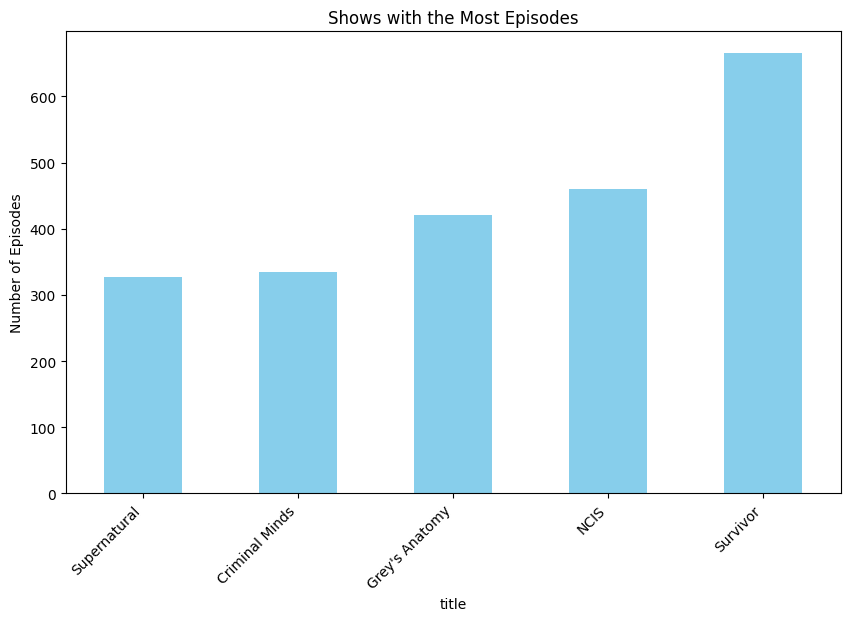

In [175]:
show_name_counts = merged_df['title'].value_counts()


max_count = show_name_counts.max()
most_episodes_shows = show_name_counts[show_name_counts == max_count]
top5_show_name_counts = show_name_counts.head(5)


top5_show_name_counts.sort_values().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('title')
plt.ylabel('Number of Episodes')
plt.title('Shows with the Most Episodes')
plt.xticks(rotation = 45, ha = "right")
plt.show()

# which language is the highest rated on average?

In [199]:
df_api.head(25)

,id,url,title,type,language,genres,status,runtime,averageRuntime,premiered,...,weight,network,webChannel,dvdCountry,externals,image,summary,updated,_links,average_ranking
0,1,https://www.tvmaze.com/shows/1/under-the-dome,Under the Dome,Scripted,English,"[Drama, Science-Fiction, Thriller]",Ended,60.0,60,2013-06-24,...,99,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,None,"{'tvrage': 25988, 'thetvdb': 264492, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>Under the Dome</b> is the story of a sma...,1704794065,{'self': {'href': 'https://api.tvmaze.com/show...,6.5
1,2,https://www.tvmaze.com/shows/2/person-of-interest,Person of Interest,Scripted,English,"[Action, Crime, Science-Fiction]",Ended,60.0,60,2011-09-22,...,97,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,None,"{'tvrage': 28376, 'thetvdb': 248742, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>You are being watched. The government has a...,1704794206,{'self': {'href': 'https://api.tvmaze.com/show...,8.8
2,3,https://www.tvmaze.com/shows/3/bitten,Bitten,Scripted,English,"[Drama, Horror, Romance]",Ended,60.0,60,2014-01-11,...,99,"{'id': 7, 'name': 'CTV Sci-Fi Channel', 'count...",None,None,"{'tvrage': 34965, 'thetvdb': 269550, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Based on the critically acclaimed series of...,1704793709,{'self': {'href': 'https://api.tvmaze.com/show...,7.4
3,4,https://www.tvmaze.com/shows/4/arrow,Arrow,Scripted,English,"[Drama, Action, Science-Fiction]",Ended,60.0,60,2012-10-10,...,97,"{'id': 5, 'name': 'The CW', 'country': {'name'...",None,None,"{'tvrage': 30715, 'thetvdb': 257655, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>After a violent shipwreck, billionaire play...",1704793737,{'self': {'href': 'https://api.tvmaze.com/show...,7.4
4,5,https://www.tvmaze.com/shows/5/true-detective,True Detective,Scripted,English,"[Drama, Crime, Thriller]",Running,60.0,62,2014-01-12,...,100,"{'id': 8, 'name': 'HBO', 'country': {'name': '...",None,None,"{'tvrage': 31369, 'thetvdb': 270633, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Touch darkness and darkness touches you bac...,1706907878,{'self': {'href': 'https://api.tvmaze.com/show...,8.2
5,6,https://www.tvmaze.com/shows/6/the-100,The 100,Scripted,English,"[Action, Adventure, Science-Fiction]",Ended,60.0,60,2014-03-19,...,98,"{'id': 5, 'name': 'The CW', 'country': {'name'...",None,None,"{'tvrage': 34770, 'thetvdb': 268592, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>Ninety-seven years ago, nuclear Armageddon ...",1704793476,{'self': {'href': 'https://api.tvmaze.com/show...,7.7
6,7,https://www.tvmaze.com/shows/7/homeland,Homeland,Scripted,English,"[Drama, Thriller, Espionage]",Ended,60.0,60,2011-10-02,...,96,"{'id': 9, 'name': 'Showtime', 'country': {'nam...",None,None,"{'tvrage': 27811, 'thetvdb': 247897, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>The winner of 6 Emmy Awards including Outst...,1704792951,{'self': {'href': 'https://api.tvmaze.com/show...,8.2
7,8,https://www.tvmaze.com/shows/8/glee,Glee,Scripted,English,"[Drama, Music, Romance]",Ended,60.0,60,2009-05-19,...,91,"{'id': 4, 'name': 'FOX', 'country': {'name': '...",None,None,"{'tvrage': 21704, 'thetvdb': 83610, 'imdb': 't...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>Glee </b>is a musical comedy about a gro...,1704794174,{'self': {'href': 'https://api.tvmaze.com/show...,6.5
8,9,https://www.tvmaze.com/shows/9/revenge,Revenge,Scripted,English,"[Drama, Thriller, Mystery]",Ended,60.0,60,2011-09-21,...,96,"{'id': 3, 'name': 'ABC', 'country': {'name': '...",None,None,"{'tvrage': 28387, 'thetvdb': 248837, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>This is not a story about forgiveness; <b>R...,1704794148,{'self': {'href': 'https://api.tvmaze.com/show...,7.7
9,10,https://www.tvmaze.com/shows/10/grimm,Grimm,Scripted,English,"[Drama, Crime, Sup

In [202]:
df_api['average_ranking'] = df_api['rating'].apply(lambda x: x['average'])


result_df = df_api.groupby('language')['average_ranking'].mean().reset_index()

In [204]:
df_api.language.unique()

array(['English', 'Japanese'], dtype=object)

In [203]:
result_df

,language,average_ranking
0,English,7.619828
1,Japanese,8.000000


In [177]:
df_api.rename(columns={'name': 'title'}, inplace=True)

In [185]:
merged_original = pd.merge(df_api, df_tv_shows, on='title', how='inner')

In [195]:
merged_original
pass

# visualization

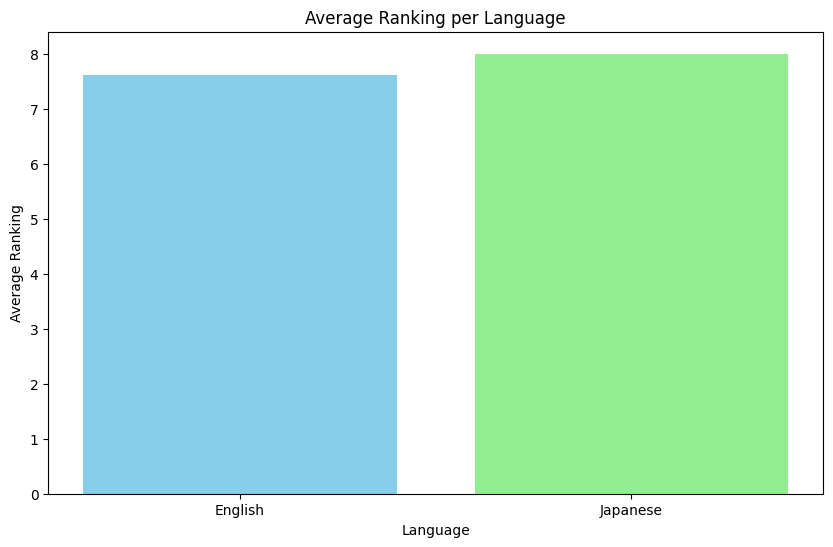

In [207]:
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightsteelblue']
plt.figure(figsize=(10, 6))
plt.bar(result_df['language'], result_df['average_ranking'], color=colors)
plt.xlabel('Language')
plt.ylabel('Average Ranking')
plt.title('Average Ranking per Language')
plt.show()

In [212]:
language_counts = df_api['language'].value_counts()
language_counts

language
English     236
Japanese      4
Name: count, dtype: int64

# how has the amount of shows released every year developed over the years?

In [215]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [225]:
df["release_year"] = df["release_year"].astype("int")
df_tv_shows["release_year"] = df_tv_shows["release_year"].astype("int")

/var/folders/sz/x51nf6p57096mncqbrxctq940000gn/T/ipykernel_58033/1464868665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv_shows["release_year"] = df_tv_shows["release_year"].astype("int")


In [226]:
df_tv_shows_after_1985 = df[df["release_year"] >= 1985]


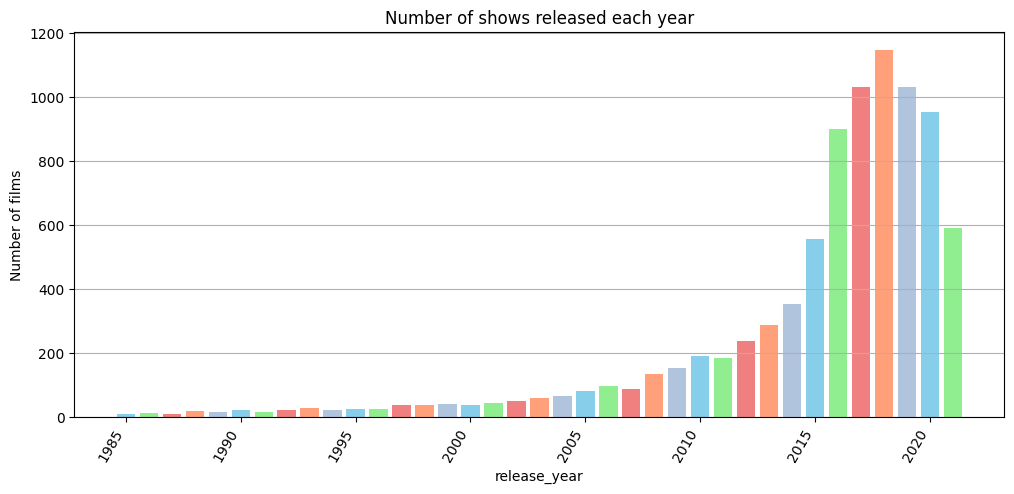

In [227]:
df_counts = df_tv_shows_after_1985.groupby('release_year').size().reset_index(name='count')

plt.figure(figsize=(12, 5))
plt.bar(df_counts['release_year'], df_counts['count'], color=colors)
plt.title('Number of shows released each year')
plt.xlabel('release_year')
plt.ylabel('Number of films')
plt.grid(axis='y')
plt.xticks(rotation = 60, ha = "right")
plt.show()

# which director has directed the most episodes? 

In [229]:
merged_df

,Show_ID,title,Episode_ID,Episode_Name,Season,Number,Airdate,show_id,type,director,country,date_added,release_year,rating,duration,listed_in
0,2,Person of Interest,28,Pilot,1,1,2011-09-22,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
1,2,Person of Interest,29,Ghosts,1,2,2011-09-29,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
2,2,Person of Interest,30,Mission Creep,1,3,2011-10-06,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
3,2,Person of Interest,31,Cura Te Ipsum,1,4,2011-10-13,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
4,2,Person of Interest,32,Judgement,1,5,2011-10-20,s7730,TV Show,Not Given,United States,9/22/2016,2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,221,Rectify,965182,Go Ask Roger,4,4,2016-11-16,s7843,TV Show,Not Given,United States,3/4/2017,2016,TV-MA,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries"
7084,221,Rectify,978159,Pineapples in Paris,4,5,2016-11-23,s7843,TV Show,Not Given,United States,3/4/2017,2016,TV-MA,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries"
7085,221,Rectify,978160,Physics,4,6,2016-11-30,s7843,TV Show,Not Given,United States,3/4/2017,2016,TV-MA,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries"
7086,221,Rectify,998303,Happy Unburdening,4,7,2016-12-07,s7843,TV Show,Not Given,United States,3/4/2017,2016,TV-MA,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries"


In [230]:
merged_df.director.unique()

array(['Not Given', 'James Bamford', 'Danny Cannon', 'Glen Winter',
       'Phil Sgriccia', 'Eli Roth', 'Kim Seong-hun'], dtype=object)

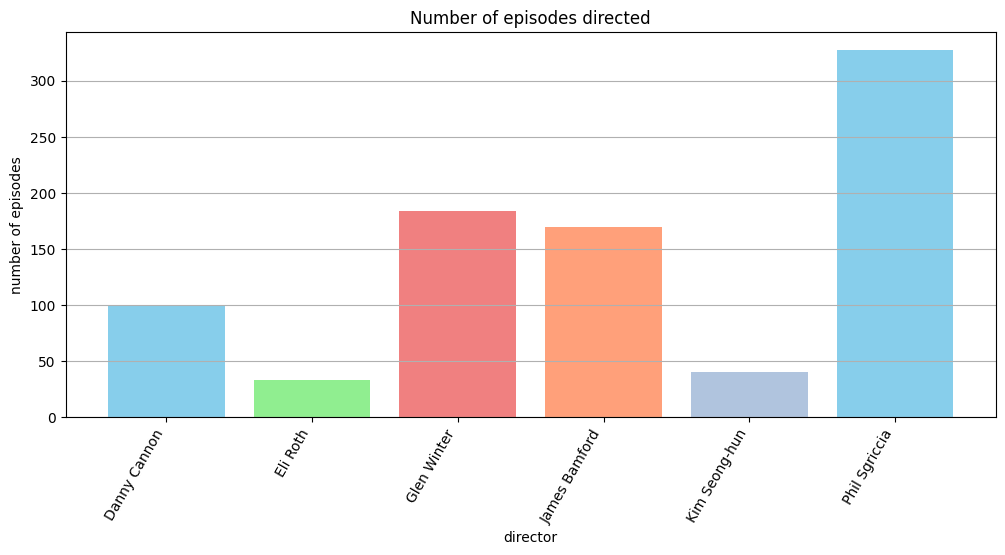

In [234]:
df_counts = merged_df.groupby('director').size().reset_index(name='count')

df_counts_filtered = df_counts[df_counts['director'] != 'Not Given']

plt.figure(figsize=(12, 5))
plt.bar(df_counts_filtered['director'], df_counts_filtered['count'], color=colors)
plt.title('Number of episodes directed')
plt.xlabel('director')
plt.ylabel('number of episodes')
plt.grid(axis='y')
plt.xticks(rotation=60, ha="right")
plt.show()


In [237]:
filter_1 = merged_df["director"] == "Phil Sgriccia"
merged_df[filter_1]

,Show_ID,title,Episode_ID,Episode_Name,Season,Number,Airdate,show_id,type,director,country,date_added,release_year,rating,duration,listed_in
1004,19,Supernatural,991,Pilot,1,1,2005-09-13,s2424,TV Show,Phil Sgriccia,United States,6/5/2020,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H..."
1005,19,Supernatural,992,Wendigo,1,2,2005-09-20,s2424,TV Show,Phil Sgriccia,United States,6/5/2020,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H..."
1006,19,Supernatural,993,Dead in the Water,1,3,2005-09-27,s2424,TV Show,Phil Sgriccia,United States,6/5/2020,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H..."
1007,19,Supernatural,994,Phantom Traveler,1,4,2005-10-04,s2424,TV Show,Phil Sgriccia,United States,6/5/2020,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H..."
1008,19,Supernatural,995,Bloody Mary,1,5,2005-10-11,s2424,TV Show,Phil Sgriccia,United States,6/5/2020,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,19,Supernatural,1797167,Drag Me Away (From You),15,16,2020-10-22,s2424,TV Show,Phil Sgriccia,United States,6/5/2020,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H..."
1327,19,Supernatural,1797168,Unity,15,17,2020-10-29,s2424,TV Show,Phil Sgriccia,United States,6/5/2020,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H..."
1328,19,Supernatural,1797169,Despair,15,18,2020-11-05,s2424,TV Show,Phil Sgriccia,United States,6/5/2020,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H..."
1329,19,Supernatural,1797170,Inherit the Earth,15,19,2020-11-12,s2424,TV Show,Phil Sgriccia,United States,6/5/2020,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H..."


# what is the longest running show?

In [239]:
df_api

,id,url,title,type,language,genres,status,runtime,averageRuntime,premiered,...,weight,network,webChannel,dvdCountry,externals,image,summary,updated,_links,average_ranking
0,1,https://www.tvmaze.com/shows/1/under-the-dome,Under the Dome,Scripted,English,"[Drama, Science-Fiction, Thriller]",Ended,60.0,60,2013-06-24,...,99,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,None,"{'tvrage': 25988, 'thetvdb': 264492, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>Under the Dome</b> is the story of a sma...,1704794065,{'self': {'href': 'https://api.tvmaze.com/show...,6.5
1,2,https://www.tvmaze.com/shows/2/person-of-interest,Person of Interest,Scripted,English,"[Action, Crime, Science-Fiction]",Ended,60.0,60,2011-09-22,...,97,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,None,"{'tvrage': 28376, 'thetvdb': 248742, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>You are being watched. The government has a...,1704794206,{'self': {'href': 'https://api.tvmaze.com/show...,8.8
2,3,https://www.tvmaze.com/shows/3/bitten,Bitten,Scripted,English,"[Drama, Horror, Romance]",Ended,60.0,60,2014-01-11,...,99,"{'id': 7, 'name': 'CTV Sci-Fi Channel', 'count...",None,None,"{'tvrage': 34965, 'thetvdb': 269550, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Based on the critically acclaimed series of...,1704793709,{'self': {'href': 'https://api.tvmaze.com/show...,7.4
3,4,https://www.tvmaze.com/shows/4/arrow,Arrow,Scripted,English,"[Drama, Action, Science-Fiction]",Ended,60.0,60,2012-10-10,...,97,"{'id': 5, 'name': 'The CW', 'country': {'name'...",None,None,"{'tvrage': 30715, 'thetvdb': 257655, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>After a violent shipwreck, billionaire play...",1704793737,{'self': {'href': 'https://api.tvmaze.com/show...,7.4
4,5,https://www.tvmaze.com/shows/5/true-detective,True Detective,Scripted,English,"[Drama, Crime, Thriller]",Running,60.0,62,2014-01-12,...,100,"{'id': 8, 'name': 'HBO', 'country': {'name': '...",None,None,"{'tvrage': 31369, 'thetvdb': 270633, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Touch darkness and darkness touches you bac...,1706907878,{'self': {'href': 'https://api.tvmaze.com/show...,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,245,https://www.tvmaze.com/shows/245/town-of-the-l...,Town of the Living Dead,Reality,English,[],Ended,30.0,30,2014-10-07,...,44,"{'id': 16, 'name': 'Syfy', 'country': {'name':...",None,None,"{'tvrage': 44602, 'thetvdb': 282253, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>In <b>Town of the Living Dead</b>, the colo...",1704795205,{'self': {'href': 'https://api.tvmaze.com/show...,NaN
236,246,https://www.tvmaze.com/shows/246/long-shadow,Long Shadow,Documentary,English,"[War, History]",Ended,60.0,60,2014-09-24,...,35,"{'id': 37, 'name': 'BBC Two', 'country': {'nam...",None,None,"{'tvrage': 44987, 'thetvdb': 286553, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>David Reynolds traces the legacy of the Gre...,1578901625,{'self': {'href': 'https://api.tvmaze.com/show...,NaN
237,247,https://www.tvmaze.com/shows/247/the-colbert-r...,The Colbert Report,Talk Show,English,[Comedy],Ended,30.0,30,2005-10-17,...,46,"{'id': 23, 'name': 'Comedy Central', 'country'...",None,None,"{'tvrage': 6715, 'thetvdb': 79274, 'imdb': 'tt...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>Feel the news along with Stephen Colbert, A...",1693353845,{'self': {'href': 'https://api.tvmaze.com/show...,7.2
238,248,https://www.tvmaze.com/shows/248/transporter-t...,Transporter: The Series,Scripted,English,"[Action, Adventure, Crime]",Ended,60.0,60,2013-01-04,...,49,"{'id': 164, 'name': 'RTL', 'country': {'name':...",None,None,"{'tvrage': 27190, 'thetvdb': 248962, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Frank Martin returns as the Transporter wit...,1704793910,{'self'

In [240]:
filter_2 =  df_api["status"] == "Running"

In [242]:
running_shows = df_api[filter_2]

In [251]:
running_shows

,id,url,title,type,language,genres,status,runtime,averageRuntime,premiered,...,weight,network,webChannel,dvdCountry,externals,image,summary,updated,_links,average_ranking
230,240,https://www.tvmaze.com/shows/240/cops,Cops,Reality,English,"[Action, Crime]",Running,30.0,30,1989-03-11,...,95,None,"{'id': 509, 'name': 'Fox Nation', 'country': {...",None,"{'tvrage': 3138, 'thetvdb': 74709, 'imdb': 'tt...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p><b>COPS</b> follows police officers, consta...",1704793385,{'self': {'href': 'https://api.tvmaze.com/show...,7.3
80,83,https://www.tvmaze.com/shows/83/the-simpsons,The Simpsons,Animation,English,"[Comedy, Family]",Running,30.0,30,1989-12-17,...,99,"{'id': 4, 'name': 'FOX', 'country': {'name': '...",None,None,"{'tvrage': 6190, 'thetvdb': 71663, 'imdb': 'tt...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>The Simpsons</b> is the longest running ...,1705492080,{'self': {'href': 'https://api.tvmaze.com/show...,8.1
108,112,https://www.tvmaze.com/shows/112/south-park,South Park,Animation,English,[Comedy],Running,30.0,30,1997-08-13,...,99,"{'id': 23, 'name': 'Comedy Central', 'country'...",None,None,"{'tvrage': 5266, 'thetvdb': 75897, 'imdb': 'tt...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>South Park</b> is an adult comedy animat...,1704794371,{'self': {'href': 'https://api.tvmaze.com/show...,8.4
81,84,https://www.tvmaze.com/shows/84/family-guy,Family Guy,Animation,English,"[Comedy, Family]",Running,30.0,30,1999-01-31,...,99,"{'id': 4, 'name': 'FOX', 'country': {'name': '...",None,None,"{'tvrage': 3506, 'thetvdb': 75978, 'imdb': 'tt...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>Family Guy</b> follows Peter Griffin the...,1705591623,{'self': {'href': 'https://api.tvmaze.com/show...,7.5
99,103,https://www.tvmaze.com/shows/103/law-order-spe...,Law & Order: Special Victims Unit,Scripted,English,"[Drama, Crime, Legal]",Running,60.0,60,1999-09-20,...,100,"{'id': 1, 'name': 'NBC', 'country': {'name': '...",None,None,"{'tvrage': 4204, 'thetvdb': 75692, 'imdb': 'tt...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>In the criminal justice system, sexually-ba...",1706910345,{'self': {'href': 'https://api.tvmaze.com/show...,7.9
109,114,https://www.tvmaze.com/shows/114/survivor,Survivor,Reality,English,[Adventure],Running,90.0,64,2000-05-31,...,98,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,None,"{'tvrage': 5418, 'thetvdb': 76733, 'imdb': 'tt...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Eighteen to twenty castaways will compete a...,1705632611,{'self': {'href': 'https://api.tvmaze.com/show...,7.5
16,18,https://www.tvmaze.com/shows/18/the-amazing-race,The Amazing Race,Reality,English,"[Action, Adventure, Family]",Running,90.0,62,2001-09-05,...,99,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,None,"{'tvrage': 5566, 'thetvdb': 77666, 'imdb': 'tt...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>From athletes and actors to tattoo artists,...",1706790229,{'self': {'href': 'https://api.tvmaze.com/show...,6.8
57,60,https://www.tvmaze.com/shows/60/ncis,NCIS,Scripted,English,"[Drama, Action, Crime]",Running,60.0,60,2003-09-23,...,100,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,None,"{'tvrage': 4628, 'thetvdb': 72108, 'imdb': 'tt...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>NCIS</b> (Naval Criminal Investigative S...,1706957844,{'self': {'href': 'https://api.tvmaze.com/show...,8.0
93,97,https://www.tvmaze.com/shows/97/the-biggest-loser,The Biggest Loser,Reality,English,[],Running,60.0,62,2004-10-19,...,73,"{'id': 30, 'name': 'USA Network', 'country': {...",None,None,"{'tvrage': 5618, 'thetvdb': 75166, 'imdb': 'tt...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>NBC's <b>The Biggest Loser</b>, a show know...",1694734858,{'self': {'href': 'https://api.tvmaze.com/show...,6.0
206,215,https://www.tvmaze.com/shows/215/american-dad,American Dad!,Animation,English,"[Comedy, Family]",Runn

In [252]:
df_api['premiered'] = pd.to_datetime(df_api['premiered'])




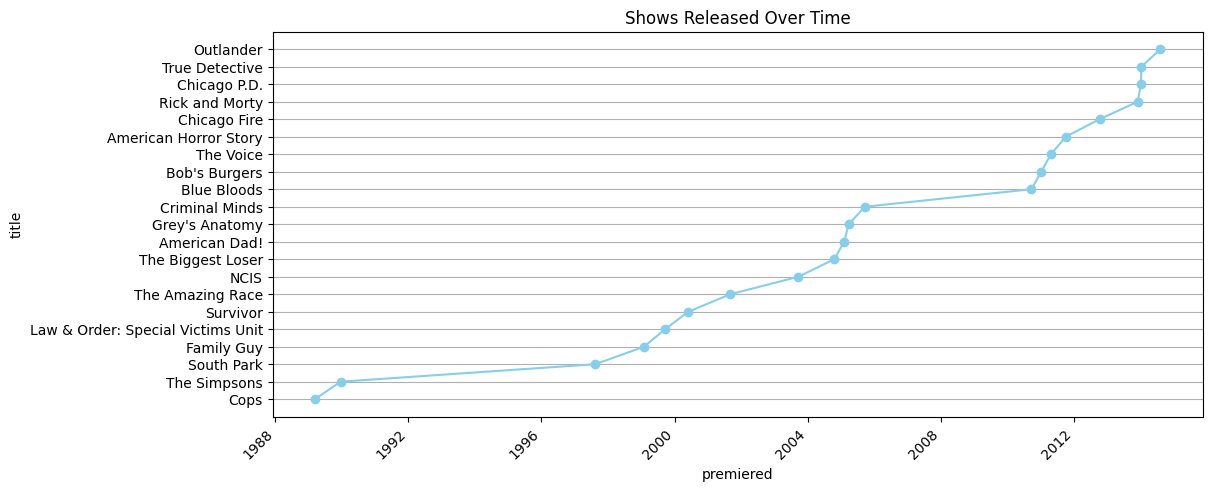

In [254]:
plt.figure(figsize=(12, 5))
plt.plot(running_shows['premiered'], running_shows['title'], marker='o', linestyle='-', color='skyblue')
plt.title('Shows Released Over Time')
plt.xlabel('premiered')
plt.ylabel('title')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

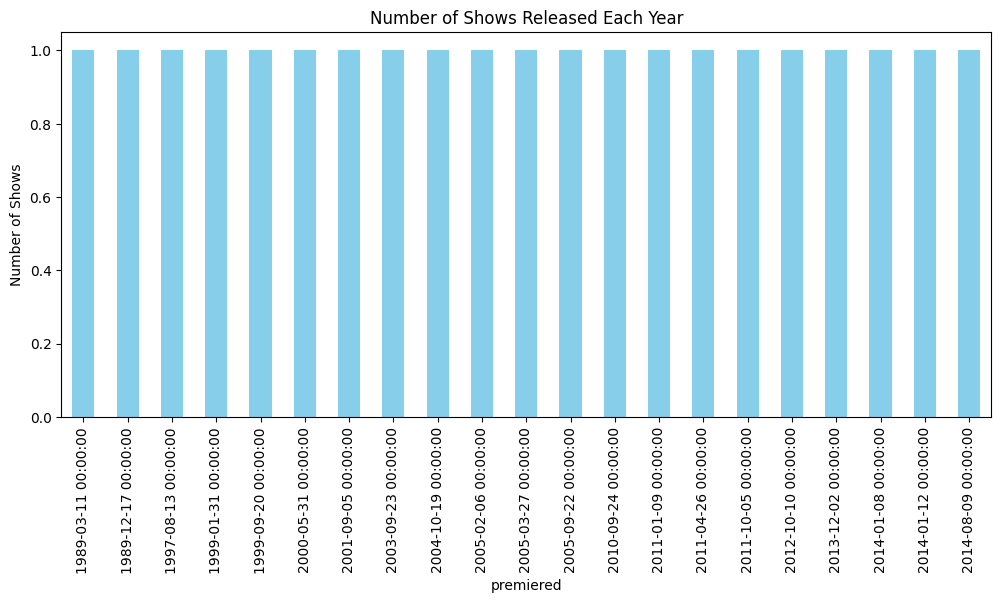

In [258]:
plt.figure(figsize=(12, 5))
running_shows['premiered'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Shows Released Each Year')
plt.xlabel('premiered')
plt.ylabel('Number of Shows')
plt.show()
